# Breadth-first Search
## MSDS-432 - Kiley - Week 6 Assignment
### Assignment Overview
The mini-programming assignment requires us to implement and test the performance of the breadth-first algorithm from *Grokking Algorithms*.

The assignment requires us to create a fictional five people in the first degree relationships.  There are to be five degrees of relationships.  There are to be no reverse relationships.

The operation to be measured is to search for one person at the first level and n on the nth level.

The output and the time required to search to be captured, reported, and analyzed.

<hr>

**Big O Notation** is a way to communicate the number of operations required to perform an algorithm in the worst-case scenario.  The number of operations is represented by n.

Found a wonderful reference site called http://bigocheatsheet.com/.


This assignment is git controlled.  The repo was prepared using git bash.

# Setting up working environment, define and test key functions
The packages selected in "In[1]" are all the packages required for the subsequent operations. <br>
They are named based on standard python naming conventions.

In [1]:
# Set up working environment
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import random
from random import randint
import string
from collections import deque
import networkx as nx

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Generate And Test Random Data 
The assignment has asked there be five degrees of five edges per five nodes.  To simplify this from a data generation perpsective, I've assumed that no node has more than one edge going to it.

I've also assumed that a number being searched would work just as effectively for this analysis as hash tables don't store/sort their values anyway.

If this were a problem, I would just generate n fake names and remap the dictionaries.

In [2]:
# Functions for generating list of tuples
# The values in the tuple are the node, and the connecting node
# This function generalizes this so that it can be perfromed 5^5 times

def get_edgy(low, high, step):
    lids=[] # generate empty list
    for i in range(low,high): #for loop to generate tuple
        lids += [(step,i)]
    return(lids)

In [3]:
# Function calls get_edgy to loop through the requested number of operations

def funk(iterator, multiple, start, stop): 
    i = start 
    out=[]
    while i <= stop:
        temp = get_edgy(start+1, start+1+multiple, i)
        i += iterator
        start += multiple
        out = out + temp
    return(out)

In [4]:
# Generate data to feed to graph
master = funk(iterator=1,multiple=5,start=0,stop=625) 

In [5]:
# Explore the a number of nodes at each degree
# Assignment requires each node have five connected nodes for five degrees

first_degree=1*5
second_degree=first_degree*5
third_degree=second_degree*5
fourth_degree=third_degree*5
fifth_degree=fourth_degree*5

print(first_degree)
print(second_degree)
print(third_degree)
print(fourth_degree)
print(fifth_degree)

5
25
125
625
3125


In [6]:
# View a sample of the data
# tuple represents the nodes being connected.
print(master[:5])

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]


In [7]:
# NetworkX Graphs will create a vizualisation that we can use
G = nx.Graph()

# Add edges from core node
G.add_edges_from(master)

# Define colors based on what degree they are
color_map = []
for node in G:
    if node == 0:
        color_map.append('black')
    elif node <=first_degree:
        color_map.append('yellow')
    elif node <=second_degree:
        color_map.append('red')
    elif node <=third_degree:
        color_map.append('orange')
    elif node <=fourth_degree:
        color_map.append('blue')
    else: color_map.append('green')      

<Figure size 1728x1728 with 0 Axes>

C:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


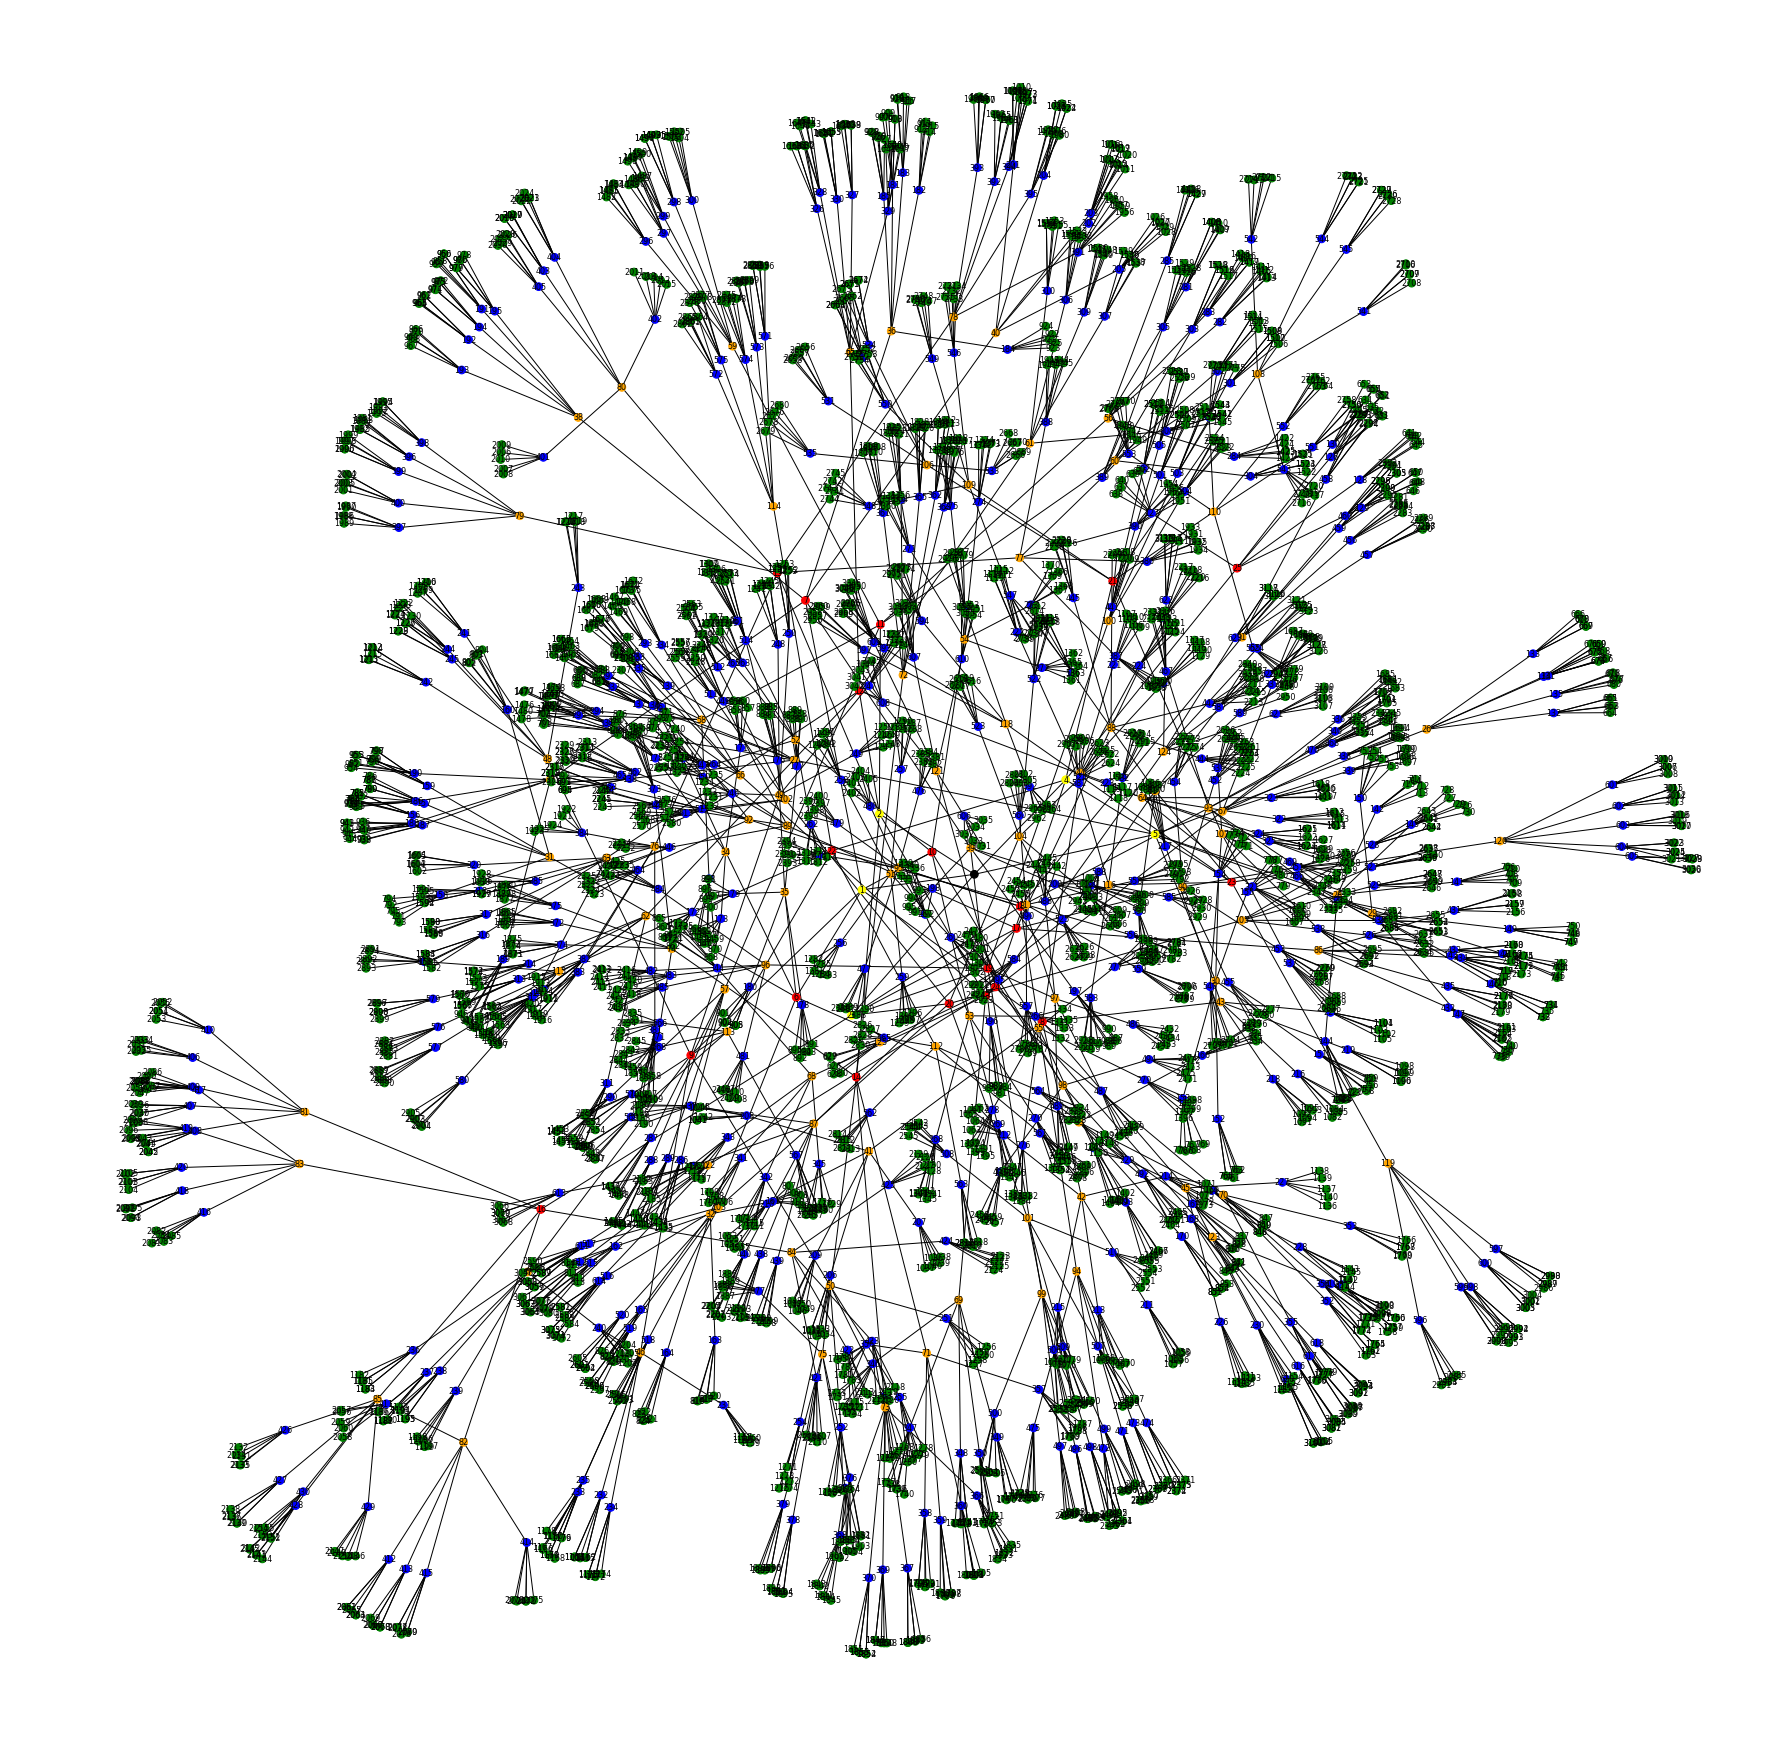

In [8]:
# Plot is too tiny without setting explicit parameters
plt.figure(3,figsize=(24,24)) 

# Draw graph
nx.draw(G,node_color = color_map, with_labels = True,
        node_size=60, font_size=8)

# Save a copy of the figure to view larger in another tool
plt.savefig("path.png")

In [9]:
# Python code to convert graph data into dictionary 
# This is the format we'd like for the search algorithm
def Convert(tup, di): 
    for a, b in tup: 
        di.setdefault(a, []).append(b) 
    return di 

# Initialize empty dictionary
master_dict = {}

# Convert edge list into dictionaries
master_dict = Convert(master,master_dict)

In [10]:
# The algorithm requires that the nodes exist even if they're empty
empties = {}

# generate empty nodes for the dead end values
for i in range(626,3131):
    empties[i] = []

In [11]:
# Merge the dictionaries; use the values from master_dict as the source of truth
master_dict_all = {**master_dict, **empties}

## Draw values to search for
Request requires that various searches are performed at various levels.

Below a list of values is created to be searched for as defined in the assignment criteria. 

In [12]:
# search for one name on the first level
s0 = [4]

# search for two names on teh second level
s1 = [17, 18]

# search for three names on the third level
s2 = [93, 94, 95]

# search for four names on teh fourth level
s3 = [431, 432, 433, 434]

# search for five names on fifth level
s4 = [1836, 1837, 1838, 1839, 1840]

# Select the Search Algorithm

**Breadth-first search** is a graphing algorithm that searches for the shortest distance between two nodes in a graph model.  The application is based on code that was sourced from *Grokking Algorithms*.  Breadth-first search operates in O(V+E) time wherev is verticies and E is edges.  

The breadth-first search operates by checking first each node in the first degree relationship, if there is not match in that degree, it then enqueues the nodes second degree relationship and so on, until the relationships and queue has been exhasuted.   

Note: a list of all checked items is required to prevent relationships that have the ability to be reversed from causing an infinite loop.

In [13]:
graph=master_dict_all

def search(value):
    search_queue = deque() #generate empty queue
    search_queue += graph[value] #add the values in the dictionary
    # This array is how you keep track of which people you've searched before.
    searched = []
    while search_queue:
        item = search_queue.popleft()
        # Only search this person if you haven't already searched them.
        if item not in searched:
            if tester(item):
                print(item)
                return True
            else:
                search_queue += graph[item]
                # Marks this person as searched
                searched.append(item)
    return False

def tester(val):
      return val == 700    
search(0)

700


True

*Algorithm worked as expected*

# Run Trials 
I could have spent more time cleaning up the function so that this could have been performed with a loop.  Since I spent so much time learning how to generate the node/edge graph I figured this would be fine. 

Run trials and store the requested data for further analysis.

In [14]:
#Assignment requirements ask for several values from each degree

# Initialize empty lists
fun_timer=list([])
fun_degree=list([])
fun_value=list([])

#======================================================================
# First Degree
#======================================================================

start = time.clock() # Timestamp start
trial_list = s0
for i in trial_list: 
    def tester(val):
          return val == i    
    search(0)
end = time.clock() # Timestamp finish    
fun_timer.append(round((end - start)*1000,6)) # Convert to milliseconds
fun_degree.append('1st Degree')
fun_value.append(s0)

#======================================================================
# Second Degree
#======================================================================

start = time.clock() # Timestamp start
trial_list = s1
for i in trial_list: 
    def tester(val):
          return val == i    
    search(0)
end = time.clock() # Timestamp finish    
fun_timer.append(round((end - start)*1000,6)) # Convert to milliseconds
fun_degree.append('2nd Degree')
fun_value.append(s1)

#======================================================================
# Third Degree
#======================================================================

start = time.clock() # Timestamp start
trial_list = s2
for i in trial_list: 
    def tester(val):
          return val == i    
    search(0)
end = time.clock() # Timestamp finish    
fun_timer.append(round((end - start)*1000,6)) # Convert to milliseconds 
fun_degree.append('3rd Degree')
fun_value.append(s2)

#======================================================================
# Fourth Degree
#======================================================================

start = time.clock() # Timestamp start
trial_list = s3
for i in trial_list: 
    def tester(val):
          return val == i    
    search(0)
end = time.clock() # Timestamp finish    
fun_timer.append(round((end - start)*1000,6)) # Convert to milliseconds 
fun_degree.append('4th Degree')
fun_value.append(s3)

#======================================================================
# Fifth Degree
#======================================================================

start = time.clock() # Timestamp start
trial_list = s4
for i in trial_list: 
    def tester(val):
          return val == i    
    search(0)
end = time.clock() # Timestamp finish    
fun_timer.append(round((end - start)*1000,6)) # Convert to milliseconds
fun_degree.append('5th Degree')
fun_value.append(s4)

4


True

17


True

18


True

93


True

94


True

95


True

431


True

432


True

433


True

434


True

1836


True

1837


True

1838


True

1839


True

1840


True

# Create Pandas Data Frame 
Pass the output data from the arrays and summarize in a pandas data frame for further analysis. 

In [15]:
# Store the performance outputs for analysis
df = pd.DataFrame({'degree': fun_degree,
                   'values_searched': fun_value,
                   'timer': fun_timer
                    })

# View the output dataframe
df

,degree,values_searched,timer
0,1st Degree,[4],4.241944
1,2nd Degree,"[17, 18]",6.513461
2,3rd Degree,"[93, 94, 95]",11.602920
3,4th Degree,"[431, 432, 433, 434]",27.678572
4,5th Degree,"[1836, 1837, 1838, 1839, 1840]",122.623634


# Visualize Results

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x262e2395438>,
 <a list of 5 Text xticklabel objects>)

Text(0, 0.5, 'Milliseconds')

Text(0.5, 1.0, 'Time to search')

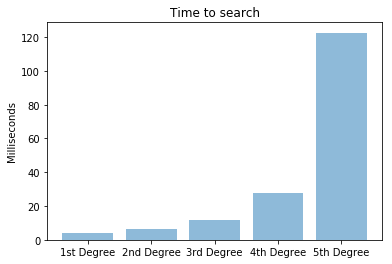

In [16]:
objects = df['degree']
y_pos = np.arange(len(objects))
performance = df['timer']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Milliseconds')
plt.title('Time to search')
 
plt.show()

The graphics above are what was created for all tests performed as part of this assigment.  
The algorithm operates extremely quickly and hardly takes any time to run.

**As the requested search value got futher from the core node, the amount of time that the algorithm took to perform increased signifcantly.**

Data engineers are required to consider how to ensure that an operation can perform effectively at scale.  This exercise helps to reinforce the value of measuring and testing algorithms as they scale.